In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import os
import math
from math import cos, sin

In [2]:
root_dir = "/aidata/anders/data_collection/okay/total/archives/WF/analyze"
idxs = np.load(os.path.join(root_dir, "idxs.npy"))
kps = np.load(os.path.join(root_dir, "kps.npy"))
params = np.load(os.path.join(root_dir, "params.npy"))
scores = np.load(os.path.join(root_dir, "scores.npy"))
idxs = idxs[:, 1:3]
print(idxs)

[[10 12]
 [11 12]
 [11 13]
 [12 12]
 [12 13]]


In [3]:
N, C = params.shape
R = params[:, :9].reshape((-1, 3, 3))
trans = kps[:, ]


In [4]:
def matrix2angle(R):
    ''' get three Euler angles from Rotation Matrix
    Args:
        R: (3,3). rotation matrix
    Returns:
        x: pitch
        y: yaw
        z: roll
    '''
    sy = math.sqrt(R[0, 0] * R[0, 0] + R[1, 0] * R[1, 0])
    singular = sy < 1e-6
    if not singular:
        x = math.atan2(R[2, 1], R[2, 2])
        y = math.atan2(-R[2, 0], sy)
        z = math.atan2(R[1, 0], R[0, 0])
    else:
        x = math.atan2(-R[1, 2], R[1, 1])
        y = math.atan2(-R[2, 0], sy)
        z = 0
    return x, y, z

In [26]:
angels = []
for r in R:
    pitch, yaw, roll = np.array(matrix2angle(r))* (180 /np.pi)
    if pitch < 0:
        pitch = -(180 + pitch)
    elif pitch > 0:
        pitch = (180 - pitch)
    a = np.array([pitch, yaw, roll]) 
    angels.append(a)
angels = np.asarray(angels)
mean = np.mean(angels, axis = 0)
std = np.std(angels, axis = 0)
print(mean)
print(std)

print(trans.mean(axis =0))
print(trans.std(axis =0))

[ -6.88559348 -14.35884136   8.71614034]
[0.1667624  4.32176092 0.3725838 ]
[334.69867 755.5983 ]
[0.44255686 0.35499898]


12 10
12 11
13 11
12 12
13 12


Text(0.5, 0, 'X')

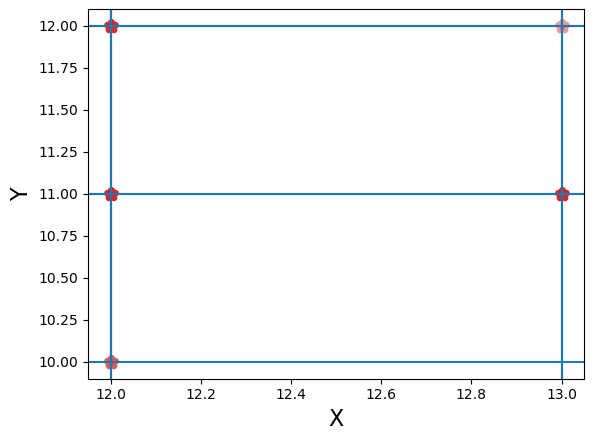

In [18]:
for idx, angle, s in zip(idxs, angels, scores):
    y, x = idx 
    y = np.abs(y )
    plt.axvline(x)
    plt.axhline(y)
    print(x, y)
    plt.scatter(x , y, c = "tab:red", marker="*", linewidths=5, alpha=s)
# plt.xlim([0, 20])
# plt.ylim([0, 20])
plt.ylabel("Y", fontsize= 16)
plt.xlabel("X", fontsize= 16)

In [11]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

<ipython-input-20-32bead3c4dc1>:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


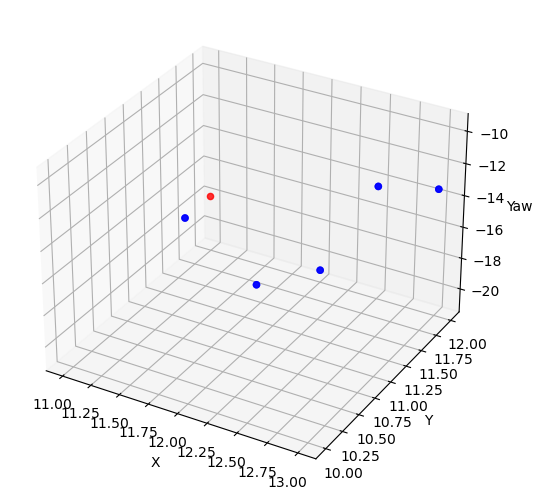

In [20]:
fig = plt.figure()
ax = Axes3D(fig)
xs = idxs[:, 1]
ys = np.abs(idxs[:, 0])
plot_geeks = ax.scatter(xs, ys, angels[:, 1], c = 'blue', alpha = 0.8)
plot_geeks = ax.scatter(xs, ys, angels[:, 1], c = 'blue', alpha = 0.8)

plot_geeks = ax.scatter(11, 12, angels[1, 1], c = 'red', alpha = 0.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Yaw')
ax.FontSize = 20